In [2]:
import pandas as pd
import numpy as np
from copy import copy

from rbm_torch.utils import data_prep as dp
from rbm_torch.utils import utils
from rbm_torch.utils import seq_utils as su
from rbm_torch.analysis import analysis_methods as am

/home/jonah/anaconda3/envs/aptamer/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Starting From our Processed Fasta Files

In [8]:
last_5_rounds = ["r12", "r13", "r14", "r15", "r16"]
thc_pd = am.fetch_data(last_5_rounds, dir="./", threads=6, molecule="rna", normalize_counts=True, normalization_denominator=1e6)

In [6]:
thc_pd.head()

,sequence,copy_num,round,assignment
0,CAUAUAGGACGACGACGGUCAACACCCGCGACAACCACAGCA-,2816.857140,r12,N/A
1,CGUACCACGAGUGGGGAUUGUGGGCAGUUGGACACGCCAGUC-,1443.547078,r12,N/A
2,GCGGGAGGGGGGGAGGGGCCCGUAACAAGAACGACAUGUAAG-,795.057367,r12,N/A
3,GCUGCUCCGCAUGAGUCAUAUCGAACGAAGGGGUGUAUACGC-,643.358240,r12,N/A
4,ACACCACGGGGAGAACACCACCAGAAACACCGCCAGACUCCA-,590.439940,r12,N/A


In [9]:
thc_ct = dp.copynum_topology_faster(thc_pd, last_5_rounds, threads_per_task=2)  # Uses Total of 10 threads

Process Time 16624.104041576385


In [11]:
thc_ct.to_csv("./thc_12_to_16_ct.csv", index=False)

In [12]:
thc_ct.index.__len__()

437749

In [18]:
thc_ct = pd.read_csv("thc_12_to_16_ct.csv")

round_names = ["r12", "r13", "r14", "r15", "r16"]
mins = thc_ct.loc[:, round_names].min()
dmin = mins-mins.min()
thc_ct[dmin.index] -= dmin

thc_ct["lr_enrichment"] = thc_ct["r16"] / thc_ct["r12"]

thc_ct["log_lr_enrichment"] = np.log(thc_ct["lr_enrichment"])

thc_ct[thc_ct["log_lr_enrichment"] > 0.0].index.__len__()
enriched = copy(thc_ct[thc_ct["log_lr_enrichment"] > 0.0])
all = copy(thc_ct[~thc_ct["log_lr_enrichment"].isna()])

print(enriched.index.__len__())
print(all.index.__len__())

11757
58747


## All Sequences

In [19]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np
from rbm_torch.utils import data_prep as dp

rand_state = 69
qt = QuantileTransformer(output_distribution="uniform", random_state=rand_state)

np.random.default_rng(rand_state)
noisy_enrich = np.random.normal(all["log_lr_enrichment"].to_numpy(), 0.001)

new_vals = qt.fit_transform(noisy_enrich.reshape(-1, 1))

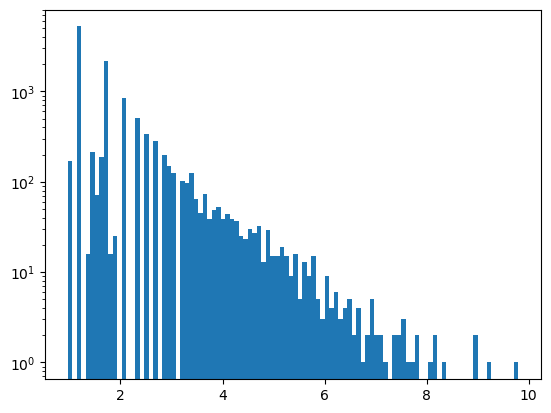

In [17]:
dp.quick_hist(enriched["log_lr_enrichment"].to_numpy())

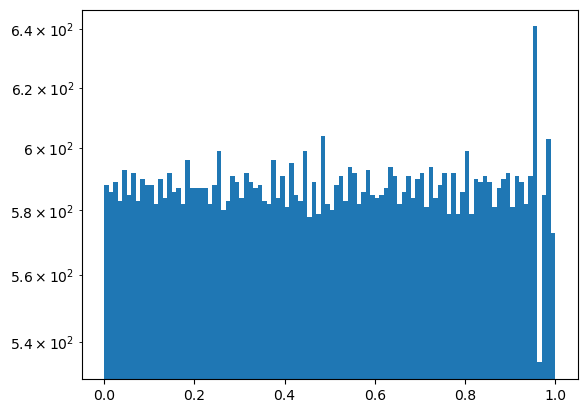

In [20]:
dp.quick_hist(new_vals)

In [21]:
dp.write_fasta(enriched["sequence"].to_list(), enriched["lr_enrichment"].to_list(), "./thc_r16_v_r12_all.fasta")
dp.make_weight_file("thc_r16_v_r12_all_uniform_weights", list(new_vals.squeeze(1)))

## Enriched Sequences only, r16/12 > 0.

In [5]:
enriched.head()

,sequence,r12,r13,r14,r15,r16,lr_enrichment,log_lr_enrichment
5,CCAGCGAAAGGGAGGGUGGGUGGGUGAGCAGGCCGCGGGUAC-,0.158796,1.308165,1.097299,0.158796,1.624855,10.232341,2.325553
14,GAGGGGGGGUGGGCAACGUAGGGACCGGGCGGCCGCACUUCA-,0.158796,1.308165,2.035801,2.064348,1.991370,12.540427,2.528958
47,GGGGGUGGGUGGGCAGGCACACAGCGGAGGGACAUGGCAGCAC,0.158796,NaN,NaN,0.158796,1.258340,7.924256,2.069928
60,CACAGGGAGGGGGGGUGGGAAGCCCAAGGUCCCGCGAAACAG-,0.158796,0.158796,0.158796,0.158796,0.525311,3.308085,1.196370
90,GGGGGGGGGGGGGGGUAGGUCCCGCAACGCACGGCGACUAAG-,0.158796,NaN,NaN,0.158796,0.891826,5.616171,1.725650


In [6]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np
from rbm_torch.utils import data_prep as dp

rand_state = 69
qt = QuantileTransformer(output_distribution="uniform", random_state=rand_state)

np.random.default_rng(rand_state)
noisy_enrich = np.random.normal(enriched["log_lr_enrichment"].to_numpy(), 0.001)

new_vals = qt.fit_transform(noisy_enrich.reshape(-1, 1))

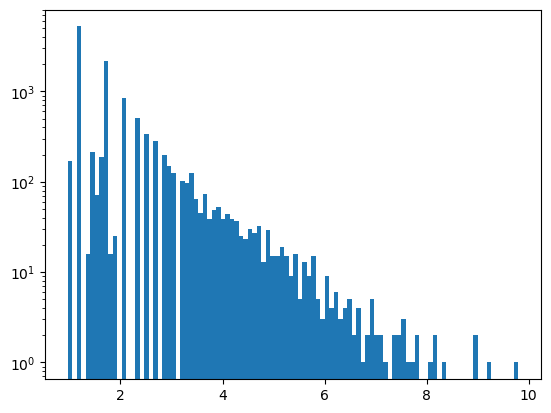

In [7]:
dp.quick_hist(enriched["log_lr_enrichment"].to_numpy())

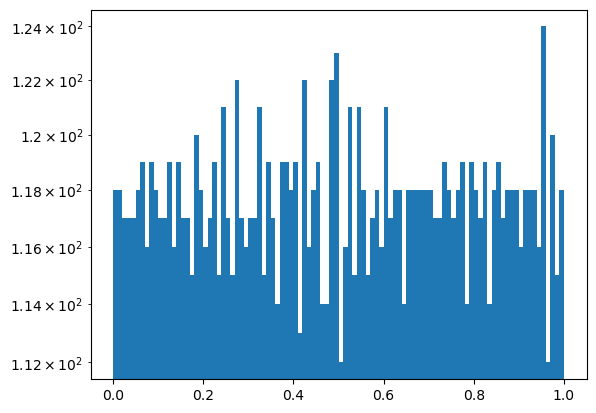

In [8]:
dp.quick_hist(new_vals)

In [14]:
dp.write_fasta(enriched["sequence"].to_list(), enriched["lr_enrichment"].to_list(), "./thc_r16_v_r12.fasta")
dp.make_weight_file("thc_r16_v_r12_uniform_weights", list(new_vals.squeeze(1)))

['CCAGCGAAAGGGAGGGUGGGUGGGUGAGCAGGCCGCGGGUAC-',
 'GAGGGGGGGUGGGCAACGUAGGGACCGGGCGGCCGCACUUCA-',
 'GGGGGUGGGUGGGCAGGCACACAGCGGAGGGACAUGGCAGCAC',
 'CACAGGGAGGGGGGGUGGGAAGCCCAAGGUCCCGCGAAACAG-',
 'GGGGGGGGGGGGGGGUAGGUCCCGCAACGCACGGCGACUAAG-',
 'GAGGGUGGGAGGGUCAGUCCCGAGCGGAACAAGGACGCCCAA-',
 'CACGGGGGGGGUGGGGGGGUGUGGGCCCGCGAACACAGCAG--',
 'GCGGGUGGGUGGGCAAGACCACAGCGCGUGAGUACAUCGAAA-',
 'GAGGGAGGGUGGGGACAUGGGCCCGGCAACGCGAAACAAUGA-',
 'GCGGGAGGGGGGGCGUGGACACGGGCGACGAAACGCAACAAG-',
 'GGGGGGGAGGGAGGGGUGGGACCGCAACAACACGACAUCACA-',
 'GCAGGAGGGUGGGCAAGGUCCACAACGCGGGGAAUAUACGGG-',
 'GGGGGGAGGGAGGAGUGGGACCGACACGACAACACACAGCACG',
 'GAGGGGGGGGGGGCAUACGUGAGACCGCAGCGAUCAACCGCG-',
 'GGGGGUGGGCGGGAAGGUCCAGCGGCGAAAAAUCAGACACGG-',
 'CAAGGGGGGGGGGGGGGGGGAAGCCAAAGGGCCCGCGAAACA-',
 'GAUGGGAGGGUGGGUCGGGGUCCCGAAGCACAAUAGAGGGGG-',
 'ACAGAAGGGUGGAAGGGAGGGCAGACCUGAGGGACAUGGCGG-',
 'GGGGGUGGGAGGGAAUAAGAGGGACCCGACGCGGAUGCAACA-',
 'GCGGGAGGGAGGGGAACGGGCCCGAAGCACGAUAUGCGAAAA-',
 'CACAGGCCAAUGGGGGGGGAGGGUGGGCAACAGGGCGG